# **Movie Recommendation System**

Phase 1

Aditi Desai
200968126


# **Objective**

The aim of this project is to build a recommender movie system

It is based on the past preferences of users on movies and their ratings

It will result in a web app with simple UI to portray the above.


# Techstack:

Python Libraries:
- NumPy
- Pandas
- Matplotlib
- Seaborn
- ploty
- scikitlearn
- streamlit (for web app)


# **Meta Data**

This dataset (ml-25m) describes 5-star rating and free-text tagging activity from [MovieLens](http://movielens.org), a movie recommendation service. It contains 25000095 ratings and 1093360 tag applications across 62423 movies. These data were created by 162541 users between January 09, 1995 and November 21, 2019. This dataset was generated on November 21, 2019.

Users were selected at random for inclusion. All selected users had rated at least 20 movies. No demographic information is included. Each user is represented by an id, and no other information is provided.

The data are contained in the files `genome-scores.csv`, `genome-tags.csv`, `links.csv`, `movies.csv`, `ratings.csv` and `tags.csv`. More details about the contents and use of all these files follows.

This and other GroupLens data sets are publicly available for download at <http://grouplens.org/datasets/>.



# Setup:

In [3]:
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df1 = pd.read_csv('movies.csv')
df1

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [5]:
df2 = pd.read_csv('ratings.csv')
df2

,userId,movieId,rating,timestamp
0,1,1,4.0,9.649827e+08
1,1,3,4.0,9.649812e+08
2,1,6,4.0,9.649822e+08
3,1,47,5.0,9.649838e+08
4,1,50,5.0,9.649829e+08
...,...,...,...,...
43079,288,32587,4.5,1.130179e+09
43080,288,32598,3.5,1.145817e+09
43081,288,33004,3.5,1.135790e+09
43082,288,33164,2.5,1.138807e+09


In [6]:
#merge movies and ratings file for further analysis
df=pd.merge(df1,df2)
df

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,9.649827e+08
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,8.474350e+08
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1.106636e+09
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1.510578e+09
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1.305696e+09
...,...,...,...,...,...,...
43079,193579,Jon Stewart Has Left the Building (2015),Documentary,184,3.5,1.537107e+09
43080,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1.537109e+09
43081,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1.537110e+09
43082,193585,Flint (2017),Drama,184,3.5,1.537110e+09


**DATA PRE-PROCESSING:**

Check for missing values

If present replace with arithmetic mean

In [7]:
df.isnull().sum()

movieId      0
title        0
genres       0
userId       0
rating       0
timestamp    1
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43084 entries, 0 to 43083
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   movieId    43084 non-null  int64  
 1   title      43084 non-null  object 
 2   genres     43084 non-null  object 
 3   userId     43084 non-null  int64  
 4   rating     43084 non-null  float64
 5   timestamp  43083 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 2.3+ MB


Missing Value present in timestamp

Either resolve the problem by 

1. replacing missing value or 
2. drop the unnecessary column

In [ ]:
#replace with mean
df.fillna(df.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [ ]:
df.replace(np.nan, 0)

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [9]:
df["rating"].replace({0 : df["rating"].mean()}, inplace = True)
df["timestamp"].replace({0 : df["timestamp"].mean()}, inplace = True)

In [10]:
#drop the column
df.drop(['timestamp'], axis = 1)

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5
...,...,...,...,...,...
43079,193579,Jon Stewart Has Left the Building (2015),Documentary,184,3.5
43080,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0
43081,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5
43082,193585,Flint (2017),Drama,184,3.5


**EXPLORATORY DATA ANALYSIS**

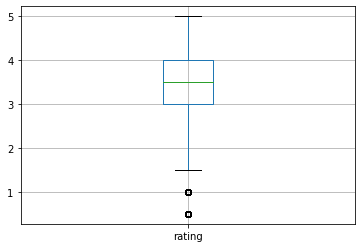

In [ ]:
#distribution of rating data
df[['rating']].boxplot()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


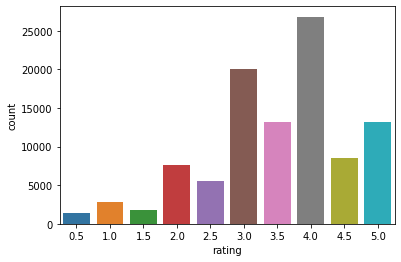

In [ ]:
#rating vs count of people visualization
sns.countplot(df['rating'])

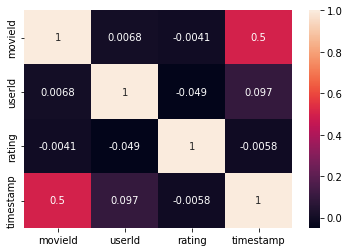

In [ ]:
#correlation visualization
sns.heatmap(df.corr(), annot=True)

In [12]:
#end of exploratory data analysis